In [1]:
import pickle
from pylab import *
import matplotlib.image as mpimg
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import h5py
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

In [2]:
#get the sbbe flux data
with open('/data/chocula/villaa/PhotoN_SuperSim/ZipSum/flux_data_sbbe_z14_0x000a_v1.pkl','rb') as readFile:
      flux_sb=pickle.load(readFile,encoding='latin1')

print(flux_sb.keys())

#get the ybe flux data
with open('/data/chocula/villaa/PhotoN_SuperSim/ZipSum/flux_data_ybe_z14_0x000a_v1.pkl','rb') as readFile:
      flux_y=pickle.load(readFile,encoding='latin1')

print(flux_y.keys())


dict_keys(['volname', 'flux_kde', 'ke', 'pz', 'px', 'py', 'ptype', 'totalevents', 'EventNum', 'y', 'color', 'time', 'Edep', 'x', 'z', 'inout'])
dict_keys(['volname', 'flux_kde', 'ke', 'pz', 'px', 'py', 'ptype', 'totalevents', 'EventNum', 'y', 'color', 'time', 'Edep', 'x', 'z', 'inout'])


In [3]:
#might as well make some 1d histograms of flux stuff

emax = 1000000
energyFlux_sb = flux_sb['ke']
print(energyFlux_sb[np.arange(4)])

n_f_sb,nx_f_sb = np.histogram(energyFlux_sb[(flux_sb['inout']==1)|(flux_sb['inout']==3)],bins=np.logspace(np.log10(0.01),np.log10(emax), 100),range=(0.1,emax))
#n,nx = np.histogram(KE[bcuts['cOVCLidA']],300,range=(0,emax))
nerr_f_sb = np.sqrt(n_f_sb)
xc_f_sb = (nx_f_sb[:-1] + nx_f_sb[1:]) / 2

energyFlux_y = flux_y['ke']
print(energyFlux_y[np.arange(4)])

n_f_y,nx_f_y = np.histogram(energyFlux_y[(flux_y['inout']==1) | (flux_y['inout']==3)],bins=np.logspace(np.log10(0.01),np.log10(emax), 100),range=(0.1,emax))
#n,nx = np.histogram(KE[bcuts['cOVCLidA']],300,range=(0,emax))
nerr_f_y = np.sqrt(n_f_y)
xc_f_y = (nx_f_y[:-1] + nx_f_y[1:]) / 2

[  1.34849090e+01   5.72503041e-02   1.93725378e+04   1.55611665e+04]
[    165.22954786     155.49199179  135115.69954505  128993.98995569]


In [4]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

In [5]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

#lay out the colors
rgb_r = (255/255.0,0/255.0,0/255.0)
rgb_b = (0/255.0,0/255.0,255/255.0)
rgb_o = (255/255.0,127/255.0,0/255.0)
rgb_b = (31/255.0,120/255.0,180/255.0)
rgb_lr = (251/255.0,154/255.0,153/255.0)
rgb_g = (203/255.0,195/255.0,195/255.0)


#try a normalization; assume exactly 1e5 gammas per neutron and a 1mCi sourcea
width = np.diff(nx_f_sb) #width in eV
#don't normalize with bin widths because it obscures relative abundance in each bin.
width_norm = np.ones(np.shape(width))
norm_sb = 1/np.float(flux_sb['totalevents'])/width_norm #per neutron primary
norm_y = 1/np.float(flux_y['totalevents'])/width_norm #per neutron primary
print(np.shape(norm))
print(np.shape(n_f_sb))
#norm = norm/width #per neutron per eV
#print(norm)
srcrate = 3.7e7/1.0e5 #n per second
#srcrate = srcrate*(24*60*60) #n per day
norm_sb = norm_sb*srcrate
norm_y = norm_y*srcrate
#print(norm)

#now include the surface area of the detector
sA = 2*np.pi*(3.0*2.54/2.0)**2 + np.pi*(3.0*2.54)*2.54 #twice for faces and then edges, assume cylinder
#sA = sA*3 #only using z14 for now
norm_sb=norm_sb/sA
norm_y=norm_y/sA

#ax1.errorbar(xc, n, yerr=nerr,marker='o', markersize=8, linestyle='none',color='k', label='data')
ax1.step(xc_f_sb,n_f_sb*norm_sb, where='mid',color=rgb_b, linestyle='-', label='IT5Z2 av. neutron Zip Flux (Sb/Be)', linewidth=2)
ax1.step(xc_f_y,n_f_y*norm_y, where='mid',color=rgb_r, linestyle='-', label='IT5Z2 av. neutron Zip Flux (Y/Be)', linewidth=2)
#ax1.step(xc_cap,n_cap_new*norm, where='mid',color='g', linestyle='-', label='re-simulated captures', linewidth=2)

ymin = 1e-1*np.min(norm_sb)
ymax = 1e5*np.max(norm_sb)

#do some filling
etherm=0.025 #what I consider "thermal" energy
#etherm=1
#ax1.fill_between(xc_f_y[xc_f_y<=etherm], np.zeros(np.shape(xc_f_y[xc_f_y<=etherm])), n_f_y[xc_f_y<=etherm]*norm_y[xc_f_y<=etherm], facecolor=rgb_r, alpha=0.3)
#ax1.fill_between(xc_f_sb[xc_f_sb<=etherm], np.zeros(np.shape(xc_f_sb[xc_f_sb<=etherm])), n_f_sb[xc_f_sb<=etherm]*norm_sb[xc_f_sb<=etherm], facecolor=rgb_b, alpha=0.3)

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(1e3, emax)
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel('neutron energy [eV]',**axis_font)
#ax1.set_ylabel('flux [(eV $\cdot$ cm$^{2}$ $\cdot$ s)$^{-1}$]',**axis_font)
ax1.set_ylabel('flux [(cm$^{2}$ $\cdot$ s)$^{-1}$]',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
#ax1.legend([gh,gl,nh,nl], ['gamma (high gain)','gamma (low gain)','neutron (high gain)', 'neutron (low gain)'],loc=1)
#ax1.legend(loc=1, bbox_to_anchor=(0.82, 1),
#         fancybox=True, shadow=True, ncol=4)
ax1.legend(loc=4,prop={'size':22})

()
(99,)


In [6]:
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

In [7]:
#do a little flux calculation
flux_y = np.sum(n_f_y[xc_f_y>50000]*norm_y[xc_f_y>50000]*width[xc_f_y>50000])
count_y = flux_y*(24*60*60)*sA

print('The Y/Be HE flux is about {0:1.3f} n/day '.format(count_y))

flux_sb = np.sum(n_f_sb[xc_f_sb>7000]*norm_sb[xc_f_sb>7000]*width[xc_f_sb>7000])
count_sb = flux_sb*(24*60*60)*sA

print('The Sb/Be HE flux is about {0:1.3f} n/day '.format(count_sb))

fluxt_y = np.sum(n_f_y[xc_f_y<=etherm]*norm_y[xc_f_y<=etherm]*width[xc_f_y<=etherm])
print('The Y/Be Thermal flux is about {0:1.2E} n/cm^2s '.format(fluxt_y))
fluxt_sb = np.sum(n_f_sb[xc_f_sb<=etherm]*norm_sb[xc_f_sb<=etherm]*width[xc_f_sb<=etherm])
print('The Sb/Be Thermal flux is about {0:1.2E} n/cm^2s '.format(fluxt_sb))

#annotate
fluxt_sb_exp = np.int(np.floor(np.log10(np.abs(fluxt_sb))))
print(fluxt_sb_exp)
fluxt_sb_s = fluxt_sb/np.power(10,np.float(fluxt_sb_exp))
sbtag='f = {0:1.2f}x10$^{{{1:1d}}}$ n/cm$^{{2}}$s'.format(fluxt_sb_s,fluxt_sb_exp)

fluxt_y_exp = np.int(np.floor(np.log10(np.abs(fluxt_y))))
print(fluxt_y_exp)
fluxt_y_s = fluxt_y/np.power(10,np.float(fluxt_y_exp))
ytag='f = {0:1.2f}x10$^{{{1:1d}}}$ n/cm$^{{2}}$s'.format(fluxt_y_s,fluxt_y_exp)
#plt.text(1e3, 1e-5, sbtag,fontsize=20)

#idx = np.digitize(0.025,nx_f_sb)-1
#ax1.annotate(sbtag, xy=(0.025, n_f_sb[idx]*norm_sb[idx]), xytext=(0.1, 1e-8),
#            arrowprops=dict(facecolor='black', shrink=0.05, width=2, headlength=10, headwidth=6), fontsize=22
#            )

#idx = np.digitize(0.025,nx_f_y)-1
#ax1.annotate(ytag, xy=(0.025, n_f_y[idx]*norm_y[idx]), xytext=(1, 1e-4),
#            arrowprops=dict(facecolor='black', shrink=0.05, width=2, headlength=10, headwidth=6), fontsize=22
#            )

The Y/Be HE flux is about 138730835.425 n/day 
The Sb/Be HE flux is about 13563571.889 n/day 
The Y/Be Thermal flux is about 2.03E-08 n/cm^2s 
The Sb/Be Thermal flux is about 1.49E-08 n/cm^2s 
-8
-8


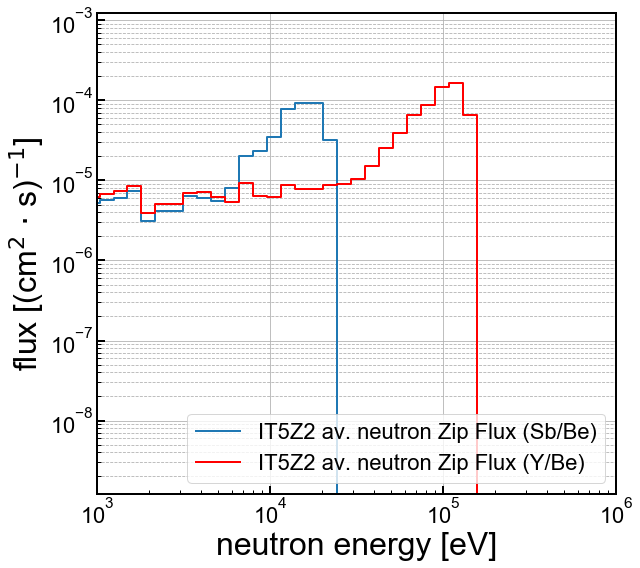

In [8]:
plt.tight_layout()
plt.savefig('figures/first_nflux_HE.png')
plt.show()